In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier

In [3]:
gamma=pd.read_csv('C:/Users/T430/Google Drive/00 - Masters/Machine Learning/Assignment 2/gamma(1).csv')
gamma

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,78.5819,20.0958,3.0137,0.1531,0.0790,13.8150,62.8954,-11.0144,4.0670,199.8640,g
1,44.7025,17.2750,2.8820,0.3005,0.1568,39.1008,31.9774,15.3809,14.5058,177.1620,g
2,53.3458,10.3460,2.5347,0.5577,0.3285,-61.4294,-29.9526,-5.2151,7.4932,300.9070,g
3,38.5054,20.5728,3.0434,0.2371,0.1235,-10.5779,28.6940,-8.6808,18.3976,146.3720,g
4,12.8950,11.2392,2.1477,0.7260,0.4377,14.5944,-8.0421,6.6514,80.9568,150.9220,g
...,...,...,...,...,...,...,...,...,...,...,...
9995,20.4074,8.6738,2.0779,0.7406,0.4451,-21.2419,20.2151,-8.2311,36.9080,221.4876,h
9996,15.5072,6.8242,2.4829,0.6901,0.3586,5.4648,9.3832,-8.8667,57.2055,221.0643,h
9997,30.1788,10.6125,2.4771,0.4600,0.2383,23.7772,16.4568,-8.6961,80.6957,156.6080,h
9998,101.4200,18.7524,3.1920,0.1748,0.0993,49.1508,23.7505,10.9015,71.0938,249.6320,h


In [4]:
#predicting class based off other variables
#As is usual in regression and
#classification problems in scikit-learn, we separate the data into a matrix X of data
#and a target vector y, consisting of the responses. In our case, we can split the data with
#the following commands:
features=["Length","Width","Size","Conc","Conc1","Asym", "M3Long", "M3Trans", "Alpha", "Dist"]
X=gamma[features]
y=gamma["class"]
X, y

(        Length    Width    Size    Conc   Conc1     Asym   M3Long  M3Trans  \
 0      78.5819  20.0958  3.0137  0.1531  0.0790  13.8150  62.8954 -11.0144   
 1      44.7025  17.2750  2.8820  0.3005  0.1568  39.1008  31.9774  15.3809   
 2      53.3458  10.3460  2.5347  0.5577  0.3285 -61.4294 -29.9526  -5.2151   
 3      38.5054  20.5728  3.0434  0.2371  0.1235 -10.5779  28.6940  -8.6808   
 4      12.8950  11.2392  2.1477  0.7260  0.4377  14.5944  -8.0421   6.6514   
 ...        ...      ...     ...     ...     ...      ...      ...      ...   
 9995   20.4074   8.6738  2.0779  0.7406  0.4451 -21.2419  20.2151  -8.2311   
 9996   15.5072   6.8242  2.4829  0.6901  0.3586   5.4648   9.3832  -8.8667   
 9997   30.1788  10.6125  2.4771  0.4600  0.2383  23.7772  16.4568  -8.6961   
 9998  101.4200  18.7524  3.1920  0.1748  0.0993  49.1508  23.7505  10.9015   
 9999   89.4076  27.2539  3.1149  0.1481  0.0741 -68.8599 -86.9093 -18.1134   
 
         Alpha      Dist  
 0      4.0670  199.864

In [5]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
#split into training and test set and set seed
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=11)


In [11]:
X_train

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
2262,47.7753,25.5877,3.3930,0.1663,0.0896,40.7421,18.9149,-8.0773,3.2370,171.7720
1454,97.7697,52.4273,4.2823,0.0722,0.0364,60.0857,78.9373,-34.8084,2.5960,270.2520
3901,22.9561,11.7472,2.4609,0.5190,0.2820,11.2829,7.3312,-5.2572,11.3196,195.3010
6246,80.2375,9.5778,2.7759,0.3178,0.1797,7.9203,43.2221,1.9162,27.1433,301.8484
1331,43.4234,15.0007,2.9050,0.3248,0.2383,24.1464,29.5295,-9.5313,5.0326,191.5030
...,...,...,...,...,...,...,...,...,...,...
1293,31.7974,17.4881,2.7931,0.2834,0.1441,2.5190,-24.1423,11.4370,18.6940,214.0530
4023,41.7024,13.0452,2.8119,0.3115,0.1581,65.5422,-12.6710,7.3867,5.5843,173.6500
7259,68.1675,17.6491,2.6488,0.4198,0.2144,-13.0659,-73.8798,12.2847,27.8760,178.3910
5200,74.4723,16.3375,2.5695,0.4898,0.2777,-58.3560,-83.8889,-17.3587,84.6412,120.3313


In [648]:
logreg=LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

(2, -0.0)

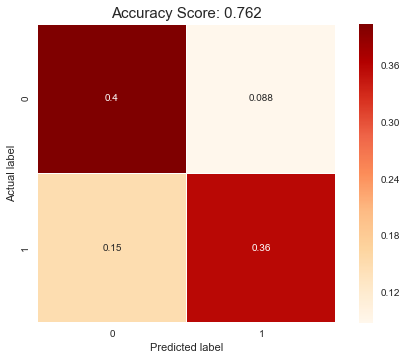

In [649]:
score=logreg.score(X_test,y_test)
cm=metrics.confusion_matrix(y_test,y_pred)
cm1 = cm/cm.sum()
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

In [650]:
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity

0.8218063466232709

In [651]:
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity

0.7041699449252558

In [652]:
metrics.recall_score(y_test,y_pred)

0.7041699449252558

In [653]:
metrics.precision_score(y_test,y_pred)

0.803411131059246

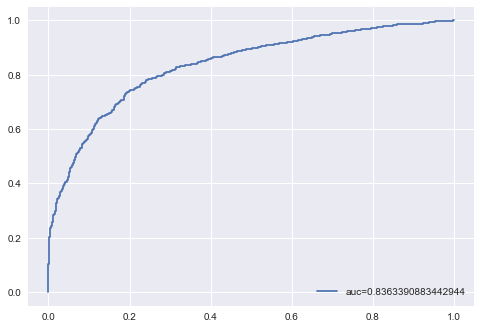

In [654]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [655]:
#DISCRIMINANT ANALYSIS
#LDA works when all the independent/predictor variables are continuous (not categorical) and follow a Normal distribution.
#Whereas in Logistic Regression this is not the case and categorical variables can be used as independent variables while making predictions.

#ALSO READ HERE FOR DIFF
#https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/#:~:text=LOGISTIC%20REGRESSION%20(LR)%3A%20While,most%20likely%20to%20belong%20to%E2%80%9D.



In [656]:
X=gamma[features].values
y=gamma["class"].values
enc=LabelEncoder()
lab_enc1=enc.fit(y)
y=lab_enc1.transform(y)
X, y

#y = y +1 

(array([[ 78.5819,  20.0958,   3.0137, ..., -11.0144,   4.067 , 199.864 ],
        [ 44.7025,  17.275 ,   2.882 , ...,  15.3809,  14.5058, 177.162 ],
        [ 53.3458,  10.346 ,   2.5347, ...,  -5.2151,   7.4932, 300.907 ],
        ...,
        [ 30.1788,  10.6125,   2.4771, ...,  -8.6961,  80.6957, 156.608 ],
        [101.42  ,  18.7524,   3.192 , ...,  10.9015,  71.0938, 249.632 ],
        [ 89.4076,  27.2539,   3.1149, ..., -18.1134,  61.152 , 201.385 ]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [657]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [658]:
#split into training and test set and set seed
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=11)

In [659]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lda=LDA(store_covariance=True)
kf=KFold(n_splits=4,shuffle=True)
kf.get_n_splits(X)
test_preds=[]
for train_index, test_index in kf.split(X):
    X_train, X_test=X[train_index], X[test_index]
    y_train, y_test=y[train_index], y[test_index]
    lda.fit(X_train,y_train)
    test_preds.append(y_test-lda.predict(X_test))
test_preds


[array([-1, -1,  0, ...,  0,  1,  0]),
 array([ 0, -1,  0, ...,  0,  0,  0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [660]:
y_pred=lda.fit(X_train,y_train).predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [661]:
#Leave-one-out cross-validation is performed by using all but one of the sample observation vectors to determine the classification function and then using that classification function to predict the omitted observation’s group membership. 
#The procedure is repeated for each observation so that each is classified by a function of the other observations.
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=lda,X=X,y=y,cv=kf)

array([0.7616, 0.7572, 0.7704, 0.7544])

In [662]:
n=y_test.shape[0]
cl=len(set(y_test))
table=[[0]*cl for i in range(cl)]
for i in range(n):
    table[y_test[i]-1][y_pred[i]-1]+=1
for i in range(cl):
    for j in range(cl):
        print('{0:3d} '.format(table[i][j]), end='')
    print("")
    


867 379 
189 1065 


In [663]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm1 = cm/cm.sum()
cm1

array([[0.426 , 0.0756],
       [0.1516, 0.3468]])

In [664]:
score = metrics.accuracy_score(y_test,y_pred)

(2, -0.0)

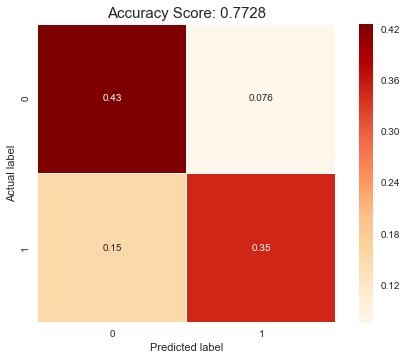

In [665]:
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

In [666]:
#THIS IS ACCURACY
(table[0][0] + table[1][1])/(sum(table[1]) + sum(table[0]))


0.7728

In [667]:
metrics.recall_score(y_test,y_pred)
#= specificity
#measures similarly the proportion of
#all negatives who are actually predicted to be negativ

0.6958266452648475

In [668]:
metrics.precision_score(y_test,y_pred)
#More generally, the precision measures the proportion of predicted positives who actually are positive

0.8210227272727273

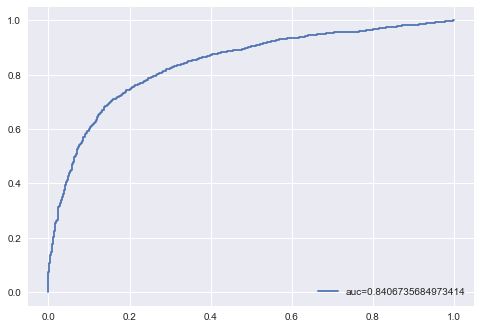

In [669]:
y_pred_proba=lda.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [670]:
#tried doing the chart here but didnt get success -  i think it only produces 1 lda because p is only one coluumn#
#but anyway, can still get accuracy of predicted stuff
#ONLY ONE LDA FOUND , BECAUSE ONLY 2 CLASSES.
# TO GET 2 LDAS, NEED 3 CLASSES

In [671]:
#QDA
qda=QDA(store_covariance=True)
gamQDA=qda.fit(X_train,y_train)
y_pred=gamQDA.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [672]:
n=y_test.shape[0]
cl=len(set(y_test))
table=[[0]*cl for i in range(cl)]
for i in range(n):
    table[y_test[i]-1][y_pred[i]-1]+=1
for i in range(cl):
    for j in range(cl):
        print('{0:3d} '.format(table[i][j]), end='')
    print("")
    

675 571 
 92 1162 


In [673]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm1 = cm/cm.sum()
cm1

array([[0.4648, 0.0368],
       [0.2284, 0.27  ]])

In [674]:
cm

array([[1162,   92],
       [ 571,  675]], dtype=int64)

In [675]:
score = metrics.accuracy_score(y_test,y_pred)

(2, -0.0)

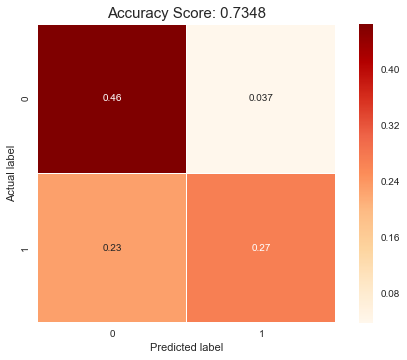

In [676]:
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

In [677]:
#THIS IS ACCURACY
(table[0][0] + table[1][1])/(sum(table[1]) + sum(table[0]))

0.7348

In [678]:
metrics.recall_score(y_test,y_pred)
#= specificity
#measures similarly the proportion of
#all negatives who are actually predicted to be negativ

0.5417335473515249

In [679]:
metrics.precision_score(y_test,y_pred)
#More generally, the precision measures the proportion of predicted positives who actually are positive

0.8800521512385919

In [680]:
sensitivity=table[1][1]/(table[1][0]+table[1][1])
sensitivity

0.9266347687400319

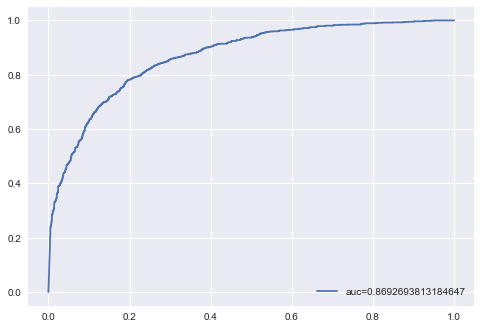

In [681]:
y_pred_proba=gamQDA.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [682]:
#split into training and test set and set seed
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=11)

In [683]:
##Decision Trees!
features=['Length','Width','Size','Conc','Conc1','Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist']
target=['class']
#X=gamma[features]
#y=gamma[target]
#y_train1 = y_train > 0
#y1 = y >0 

In [684]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=11)


In [685]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [686]:
#y_train1 = y_train.replace({'class': {'g': True, 'h': False}})
y_train1 = y_train > 0 

In [687]:
y_train1

array([False, False, False, ...,  True,  True,  True])

In [688]:
X_train
#dataset = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1]})
#print(dataset)

array([[ 44.7025,  17.275 ,   2.882 , ...,  15.3809,  14.5058, 177.162 ],
       [ 53.3458,  10.346 ,   2.5347, ...,  -5.2151,   7.4932, 300.907 ],
       [ 12.895 ,  11.2392,   2.1477, ...,   6.6514,  80.9568, 150.922 ],
       ...,
       [ 30.1788,  10.6125,   2.4771, ...,  -8.6961,  80.6957, 156.608 ],
       [101.42  ,  18.7524,   3.192 , ...,  10.9015,  71.0938, 249.632 ],
       [ 89.4076,  27.2539,   3.1149, ..., -18.1134,  61.152 , 201.385 ]])

In [689]:
treeclf=DecisionTreeClassifier(max_depth=4)
treeclf.fit(X_train,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [690]:
treeclf.feature_importances_
yhat=treeclf.predict(X_test)


In [691]:
#do some analysis on accuracy

cm=metrics.confusion_matrix(y_test,yhat)
cm1 = cm/cm.sum()


In [692]:
score = metrics.accuracy_score(y_test,yhat)
score

0.78

In [693]:
cm1

array([[0.4368, 0.0648],
       [0.1552, 0.3432]])

(2, -0.0)

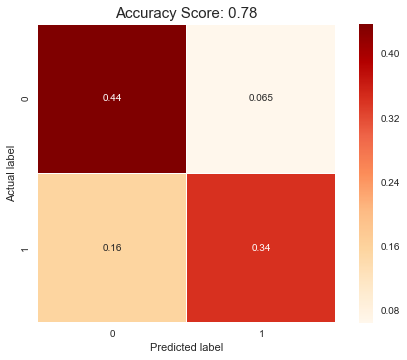

In [694]:
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

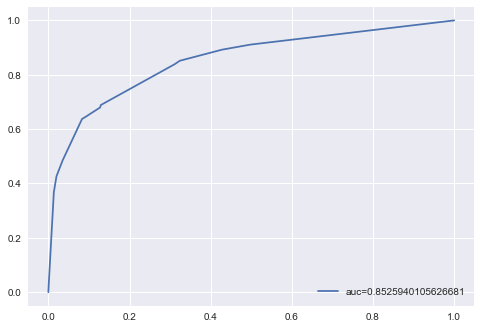

In [695]:
#do roc curve
y_pred_proba=treeclf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)


In [696]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from IPython.display import Image
dot_data=export_graphviz(treeclf,out_file="treeclf.dot",feature_names=features)
#plot_tree(treeclf,class_names=target,feature_names=features)

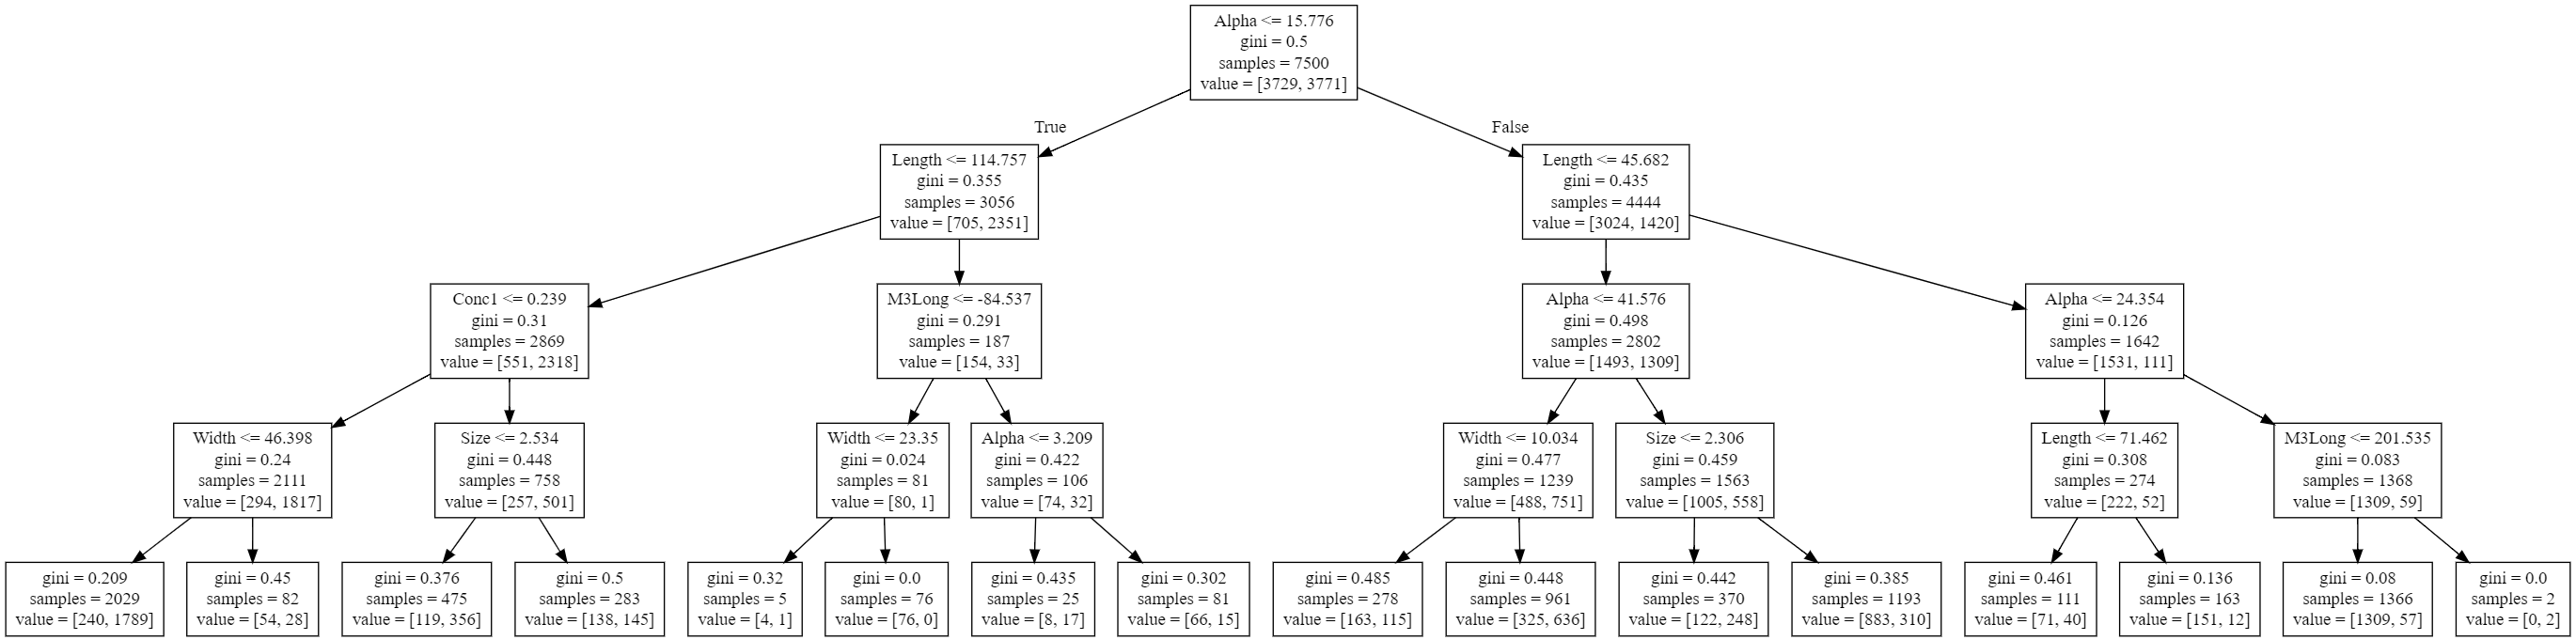

In [697]:
Image("treeclf.png")

In [698]:
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity

0.8708133971291866

In [699]:
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity

0.6886035313001605

In [700]:
metrics.recall_score(y_test,yhat)

0.6886035313001605

In [701]:
metrics.precision_score(y_test,yhat)

0.8411764705882353

In [702]:
y_train1

array([False, False, False, ...,  True,  True,  True])

In [703]:
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier(n_estimators=50)
rfclf.fit(X_train,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [704]:
yhat=rfclf.predict(X_test)
cm=metrics.confusion_matrix(yhat,y_test)
cm


array([[1110,  232],
       [ 144, 1014]], dtype=int64)

In [705]:
score = metrics.accuracy_score(y_test,yhat)
score
#good accuracy

0.8496

In [706]:
cm1 = cm/cm.sum() #make percentage

(2, -0.0)

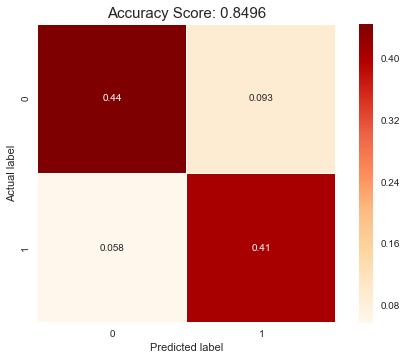

In [707]:
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

In [708]:
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity

specificity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity

metrics.recall_score(y_test,y_pred)

metrics.precision_score(y_test,y_pred)

0.8800521512385919

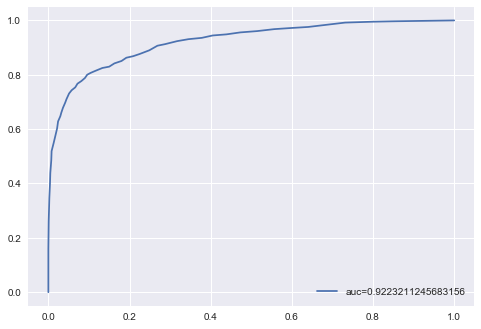

In [709]:
y_pred_proba=rfclf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [710]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [711]:
yhat = gbc.predict(X_test)
cm=metrics.confusion_matrix(yhat,y_test)
cm
cm1 = cm/cm.sum()
score = metrics.accuracy_score(y_test,yhat)
score

0.8476

(2, -0.0)

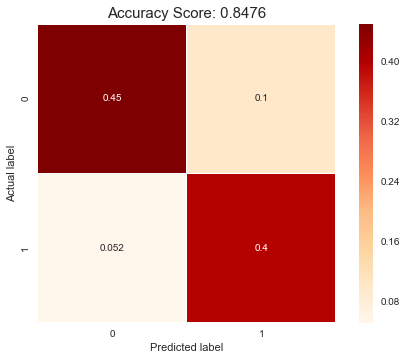

In [712]:
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

In [713]:
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity

specificity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity

metrics.recall_score(y_test,y_pred)

metrics.precision_score(y_test,y_pred)

0.8800521512385919

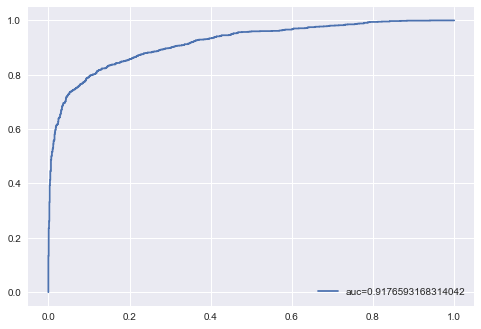

In [714]:
y_pred_proba=gbc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [715]:
#xgboost

from xgboost import XGBClassifier
xgbclf=XGBClassifier()
xgbclf.fit(X_train,y_train)
xgbclf
yhat=xgbclf.predict(X_test)
cm=metrics.confusion_matrix(yhat,y_test)
cm
cm1 = cm/cm.sum()
score = metrics.accuracy_score(y_test,yhat)
score

0.8424

(2, -0.0)

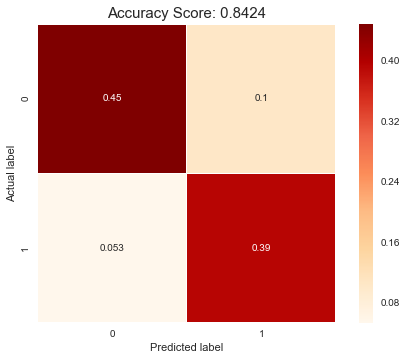

In [716]:
fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

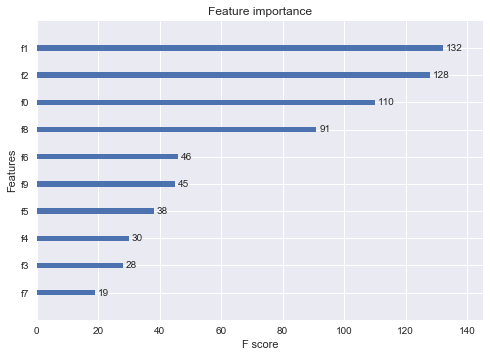

In [717]:
from xgboost import plot_importance
plot_importance(xgbclf)

In [718]:

sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity

specificity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity

metrics.recall_score(y_test,y_pred)

metrics.precision_score(y_test,y_pred)

0.8800521512385919

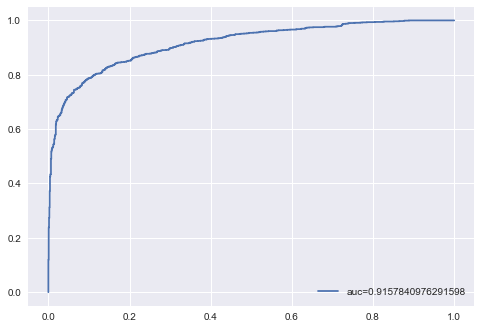

In [720]:
y_pred_proba=xgbclf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [6]:
##DO GRID SEARCH TO FIND BEST PARAMS - this takes an hour, come back to this another time 
#from sklearn.ensemble import RandomForestClassifier
#rfclf=RandomForestClassifier(n_estimators=50)
#rfclf.fit(X_train,y_train1)
# from sklearn.model_selection import GridSearchCV
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(rfclf, hyperF, cv = 3, verbose = 1, 
#                       n_jobs = -1)
# bestF = gridF.fit(X_train, y_train)

#We can find the best estimator with tunesvc.best_estimator_, 
#and the best parameters are stored in tunesvc.best_params_; 
#the best score is tunesvc.best_score_.

In [7]:
##SVM
from sklearn.svm import SVC

In [ ]:
#Create a svm Classifier
svmclf = SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
svmclf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svmclf.predict(X_test)

C:\Users\T430\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
cm=metrics.confusion_matrix(y_pred, y_test)
cm
cm1 = cm/cm.sum()

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='OrRd')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)

In [ ]:
#change the kernel and test is better , eg rbf, linear , poly 

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
from tensorflow.keras.models import Sequential
model=keras.Sequential()

In [9]:
X_test.shape

(2500, 10)